# Task-2: Prediction using Unsupervised ML
    
##  


# PRUDVIRAJ AARETI

In [1]:
#imporing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
import seaborn as sns

%matplotlib inline


In [2]:
#loading iris dataset
iris = pd.read_csv("iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# EXPLORATORY DATA ANALYSIS

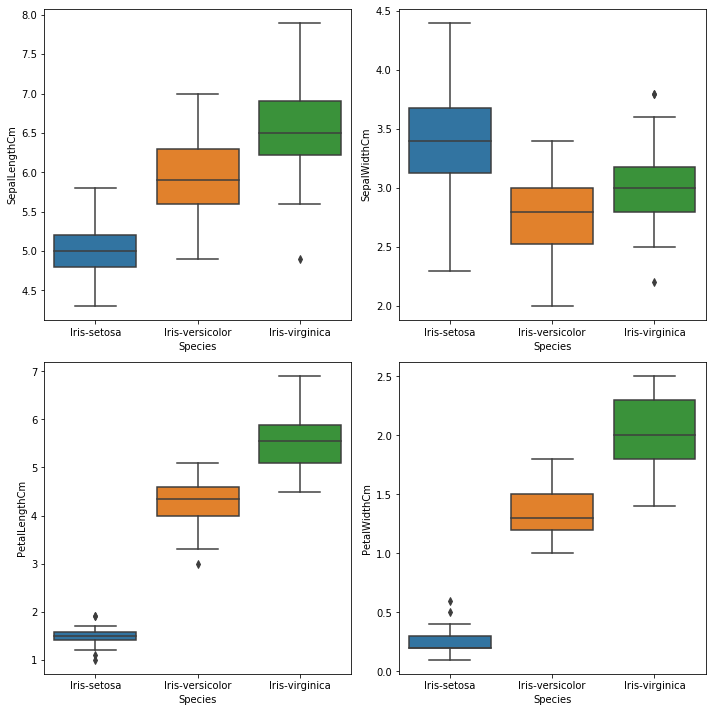

In [4]:

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='SepalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='PetalWidthCm',data=iris)
plt.tight_layout()
plt.show()


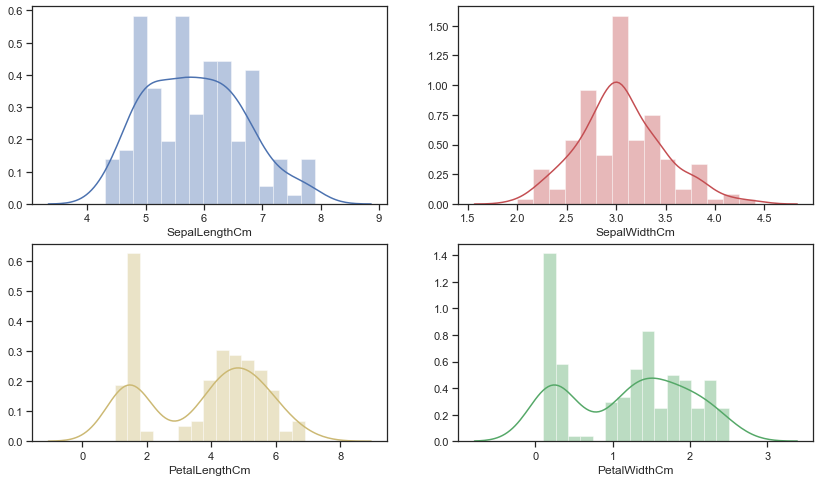

In [5]:

sns.set(style="ticks") 
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
sns.distplot(iris['SepalLengthCm'] , color="b", bins=15)
plt.subplot(2,2,2)
sns.distplot(iris["SepalWidthCm"], color = "r", bins=15)
plt.subplot(2,2,3)
sns.distplot(iris["PetalLengthCm"], color="y" ,bins=15)
plt.subplot(2,2,4)
sns.distplot(iris["PetalWidthCm"], color="g", bins=15)
plt.show()


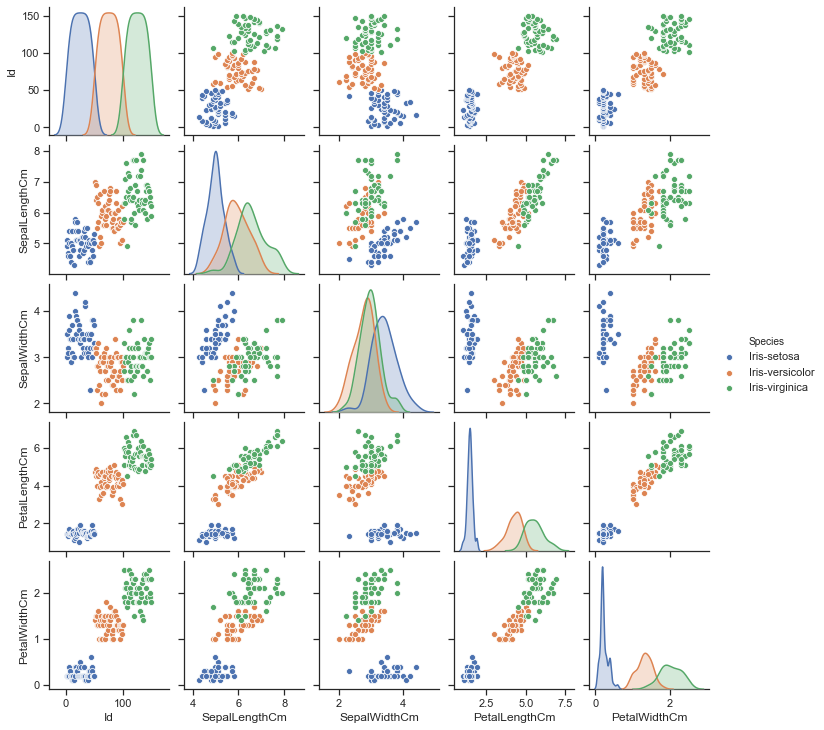

In [6]:

_= sns.pairplot(iris, hue = "Species", height = 2)


# Model Training and Prediction


Finding the optimal clusters in dataset using Elbow method

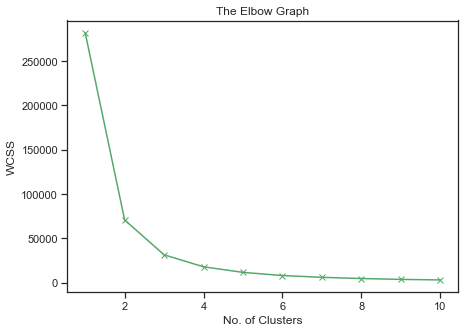

In [7]:
X = iris.iloc[:,[0,1,2,3,4]].values

Sum_of_squared_distances = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i , init="k-means++", random_state = 0)
    kmean.fit(X)
    Sum_of_squared_distances.append(kmean.inertia_)
    

plt.figure(figsize=(7,5))
plt.plot(range(1,11),Sum_of_squared_distances,'bx-',color = 'g')
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("The Elbow Graph")
plt.show()


From the above plot we can choose the number of clusters are "3"

Visualizing the clusters

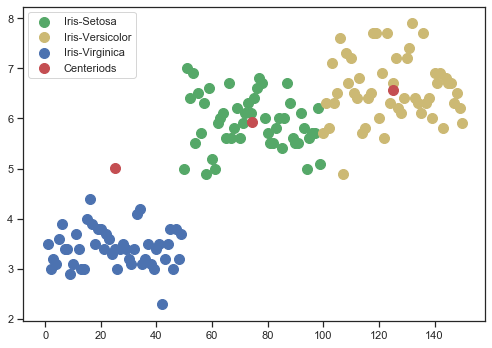

In [9]:

kmean = KMeans(n_clusters=3, init="k-means++", random_state = 1)
y = kmean.fit_predict(X)


plt.figure(figsize=(7,5))
plt.scatter(X[y==0, 0] , X[y==0, 1] ,s=100, c="g", label="Iris-Setosa")
plt.scatter(X[y==1, 0] , X[y==1, 1] ,s=100, c="y" ,label="Iris-Versicolor")
plt.scatter(X[y==2, 0] , X[y==2, 2] ,s=100, c="b" ,label="Iris-Virginica")
plt.scatter(kmean.cluster_centers_[:,0] ,kmean.cluster_centers_[:,1], s=100, c ="r",label="Centeriods")
plt.legend()
plt.tight_layout()
plt.show()
